In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('image_bins_stats.csv')
data.shape

(24000, 98)

In [3]:
data.head()

,filename,rmean_bins0,rmean_bins1,rmean_bins2,rmean_bins3,rmean_bins4,rmean_bins5,rmean_bins6,rmean_bins7,rstd_bins0,...,bskew_bins7,bkurto_bins0,bkurto_bins1,bkurto_bins2,bkurto_bins3,bkurto_bins4,bkurto_bins5,bkurto_bins6,bkurto_bins7,class
0,clean_p_1.jpg,1.485688,116.416667,0.0,0.0,0.000000,128.758621,0.0,159.770015,11.472993,...,7.358843,47.621590,3.092351,0.0,0.0,0.000000,8.421707,0.0,9.181035,1
1,clean_p_2.jpg,0.191129,91.000000,0.0,0.0,0.000000,122.485714,0.0,149.839854,0.626280,...,8.430080,7.154429,0.840896,0.0,0.0,0.000000,15.029039,0.0,10.516990,1
2,clean_p_3.jpg,1.218065,115.000000,0.0,0.0,121.730769,135.517857,0.0,154.189458,10.132966,...,7.949709,43.394240,0.420448,0.0,0.0,7.701832,13.599319,0.0,10.354453,1
3,clean_p_4.jpg,0.148524,98.000000,0.0,0.0,0.000000,129.906667,0.0,157.583812,0.573290,...,8.987692,6.601182,2.619225,0.0,0.0,0.000000,12.787280,0.0,10.943418,1
4,clean_p_5.jpg,0.183128,0.000000,0.0,0.0,0.000000,0.000000,0.0,158.600042,0.602004,...,7.204324,6.869720,0.000000,0.0,0.0,0.000000,0.000000,0.0,8.924785,1


In [4]:
data = data.drop(['filename'], axis=1)

In [5]:
data.head()

,rmean_bins0,rmean_bins1,rmean_bins2,rmean_bins3,rmean_bins4,rmean_bins5,rmean_bins6,rmean_bins7,rstd_bins0,rstd_bins1,...,bskew_bins7,bkurto_bins0,bkurto_bins1,bkurto_bins2,bkurto_bins3,bkurto_bins4,bkurto_bins5,bkurto_bins6,bkurto_bins7,class
0,1.485688,116.416667,0.0,0.0,0.000000,128.758621,0.0,159.770015,11.472993,1.943118,...,7.358843,47.621590,3.092351,0.0,0.0,0.000000,8.421707,0.0,9.181035,1
1,0.191129,91.000000,0.0,0.0,0.000000,122.485714,0.0,149.839854,0.626280,0.000000,...,8.430080,7.154429,0.840896,0.0,0.0,0.000000,15.029039,0.0,10.516990,1
2,1.218065,115.000000,0.0,0.0,121.730769,135.517857,0.0,154.189458,10.132966,0.000000,...,7.949709,43.394240,0.420448,0.0,0.0,7.701832,13.599319,0.0,10.354453,1
3,0.148524,98.000000,0.0,0.0,0.000000,129.906667,0.0,157.583812,0.573290,2.000000,...,8.987692,6.601182,2.619225,0.0,0.0,0.000000,12.787280,0.0,10.943418,1
4,0.183128,0.000000,0.0,0.0,0.000000,0.000000,0.0,158.600042,0.602004,0.000000,...,7.204324,6.869720,0.000000,0.0,0.0,0.000000,0.000000,0.0,8.924785,1


In [6]:
import numpy as np
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

clean_dataset(data)

,rmean_bins0,rmean_bins1,rmean_bins2,rmean_bins3,rmean_bins4,rmean_bins5,rmean_bins6,rmean_bins7,rstd_bins0,rstd_bins1,...,bskew_bins7,bkurto_bins0,bkurto_bins1,bkurto_bins2,bkurto_bins3,bkurto_bins4,bkurto_bins5,bkurto_bins6,bkurto_bins7,class
0,1.485688,116.416667,0.0,0.0,0.000000,128.758621,0.000000,159.770015,11.472993,1.943118,...,7.358843,47.621590,3.092351,0.0,0.0,0.000000,8.421707,0.000000,9.181035,1.0
1,0.191129,91.000000,0.0,0.0,0.000000,122.485714,0.000000,149.839854,0.626280,0.000000,...,8.430080,7.154429,0.840896,0.0,0.0,0.000000,15.029039,0.000000,10.516990,1.0
2,1.218065,115.000000,0.0,0.0,121.730769,135.517857,0.000000,154.189458,10.132966,0.000000,...,7.949709,43.394240,0.420448,0.0,0.0,7.701832,13.599319,0.000000,10.354453,1.0
3,0.148524,98.000000,0.0,0.0,0.000000,129.906667,0.000000,157.583812,0.573290,2.000000,...,8.987692,6.601182,2.619225,0.0,0.0,0.000000,12.787280,0.000000,10.943418,1.0
4,0.183128,0.000000,0.0,0.0,0.000000,0.000000,0.000000,158.600042,0.602004,0.000000,...,7.204324,6.869720,0.000000,0.0,0.0,0.000000,0.000000,0.000000,8.924785,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23994,0.167535,0.000000,0.0,0.0,0.000000,0.000000,0.000000,145.580835,0.587364,0.000000,...,6.817875,7.277478,0.000000,0.0,0.0,0.000000,0.000000,0.000000,11.111529,0.0
23995,0.182460,0.000000,0.0,0.0,0.000000,0.000000,0.000000,142.290042,0.590877,0.000000,...,5.262551,8.170191,0.000000,0.0,0.0,0.000000,0.000000,0.000000,10.111068,0.0
23996,0.222222,0.000000,0.0,0.0,0.000000,0.000000,0.000000,145.978772,0.689536,0.000000,...,5.407731,7.859719,0.000000,0.0,0.0,0.000000,0.000000,0.000000,9.734824,0.0
23997,0.217425,0.000000,0.0,0.0,0.000000,0.000000,0.000000,145.915418,0.665380,0.000000,...,5.073114,7.887594,0.000000,0.0,0.0,0.000000,0.000000,0.000000,9.672132,0.0


In [7]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['class'], axis=1),
    data['class'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((16799, 96), (7200, 96))

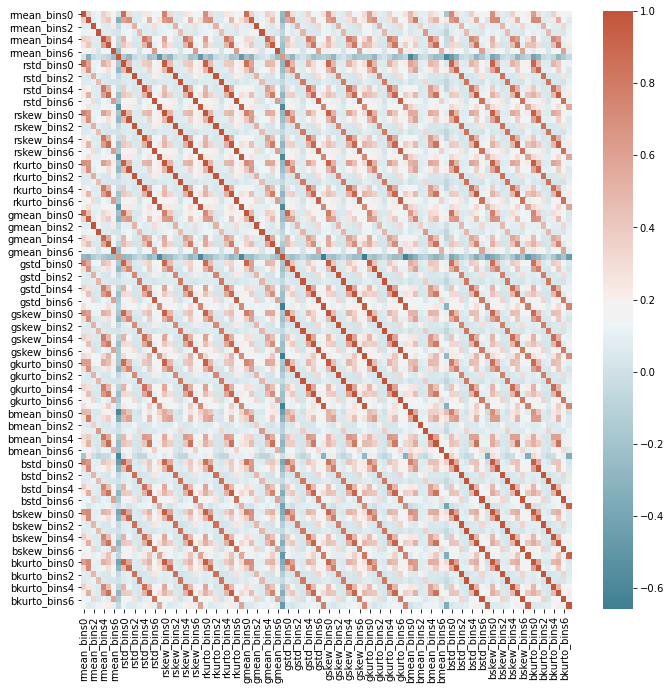

In [8]:
# visualise correlated features:

# I will build a correlation matrix, which examines the 
# correlation of all features (that is, for all possible feature combinations)
# and then visualise the correlation matrix using a heatmap

# the default correlation method of pandas.corr is pearson
# I include it anyways for the demo
corrmat = X_train.corr(method='pearson')

# we can make a heatmap with the package seaborn
# and customise the colours of searborn's heatmap
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# some more parameters for the figure
fig, ax = plt.subplots()
fig.set_size_inches(11,11)

# and now plot the correlation matrix
sns.heatmap(corrmat, cmap=cmap)

In [9]:
# build a dataframe with the correlation between features
# remember that the absolute value of the correlation
# coefficient is important and not the sign

corrmat = X_train.corr()
corrmat = corrmat.abs().unstack() # absolute value of corr coef
corrmat = corrmat.sort_values(ascending=False)
corrmat = corrmat[corrmat >= 0.8]
corrmat = corrmat[corrmat < 1]
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['feature1', 'feature2', 'corr']
corrmat.head()

,feature1,feature2,corr
0,rskew_bins3,rkurto_bins3,0.999641
1,rkurto_bins3,rskew_bins3,0.999641
2,rskew_bins4,rkurto_bins4,0.999470
3,rkurto_bins4,rskew_bins4,0.999470
4,rkurto_bins2,rskew_bins2,0.999460


In [10]:
# find groups of correlated features

grouped_feature_ls = []
correlated_groups = []

for feature in corrmat.feature1.unique():
    
    if feature not in grouped_feature_ls:

        # find all features correlated to a single feature
        correlated_block = corrmat[corrmat.feature1 == feature]
        grouped_feature_ls = grouped_feature_ls + list(
            correlated_block.feature2.unique()) + [feature]

        # append the block of features to the list
        correlated_groups.append(correlated_block)

print('found {} correlated groups'.format(len(correlated_groups)))
print('out of {} total features'.format(X_train.shape[1]))

found 21 correlated groups
out of 96 total features


In [11]:
# now we can print out each group. We see that some groups contain
# only 2 correlated features, some other groups present several features 
# that are correlated among themselves.

for group in correlated_groups:
    print(group)
    print()

        feature1      feature2      corr
0    rskew_bins3  rkurto_bins3  0.999641
15   rskew_bins3    rstd_bins3  0.999271
426  rskew_bins3   bskew_bins3  0.838694
429  rskew_bins3    bstd_bins3  0.838481
441  rskew_bins3  bkurto_bins3  0.829427
497  rskew_bins3    gstd_bins3  0.801997

        feature1      feature2      corr
2    rskew_bins4  rkurto_bins4  0.999470
27   rskew_bins4    rstd_bins4  0.998989
320  rskew_bins4    gstd_bins4  0.866748
331  rskew_bins4  gkurto_bins4  0.864690
333  rskew_bins4   gskew_bins4  0.864497
349  rskew_bins4  bkurto_bins4  0.859824
354  rskew_bins4   bskew_bins4  0.858729
368  rskew_bins4    bstd_bins4  0.856214
469  rskew_bins4   rmean_bins4  0.809383

         feature1      feature2      corr
4    rkurto_bins2   rskew_bins2  0.999460
86   rkurto_bins2    rstd_bins2  0.996647
358  rkurto_bins2    bstd_bins2  0.858356
377  rkurto_bins2  bkurto_bins2  0.854159
384  rkurto_bins2   bskew_bins2  0.852439

        feature1      feature2      corr
6    gs

In [12]:
# we can now investigate further features within one group.
# let's for example select group 1

group = correlated_groups[1]
group

,feature1,feature2,corr
2,rskew_bins4,rkurto_bins4,0.999470
27,rskew_bins4,rstd_bins4,0.998989
320,rskew_bins4,gstd_bins4,0.866748
331,rskew_bins4,gkurto_bins4,0.864690
333,rskew_bins4,gskew_bins4,0.864497
349,rskew_bins4,bkurto_bins4,0.859824
354,rskew_bins4,bskew_bins4,0.858729
368,rskew_bins4,bstd_bins4,0.856214
469,rskew_bins4,rmean_bins4,0.809383


In [19]:
from sklearn.ensemble import RandomForestClassifier

# add all features of the group to a list
features = list(group['feature2'].unique())+['rskew_bins4']

# train a random forest 
rf = RandomForestClassifier(n_estimators=200, random_state=39, max_depth=4)
rf.fit(X_train[features].fillna(0), y_train)

RandomForestClassifier(max_depth=4, n_estimators=200, random_state=39)

In [20]:
# get the feature importance attributed by the 
# random forest model (more on this in coming lectures)

importance = pd.concat(
    [pd.Series(features),
     pd.Series(rf.feature_importances_)], axis=1)

importance.columns = ['feature', 'importance']

# sort features by importance, most important first
importance.sort_values(by='importance', ascending=False)

,feature,importance
8,rmean_bins4,0.400081
4,gskew_bins4,0.208988
2,gstd_bins4,0.147685
3,gkurto_bins4,0.125166
0,rkurto_bins4,0.036029
9,rskew_bins4,0.035851
1,rstd_bins4,0.031458
6,bskew_bins4,0.013504
7,bstd_bins4,0.000644
5,bkurto_bins4,0.000594


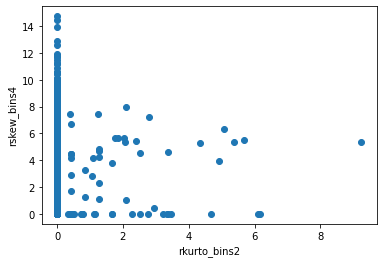

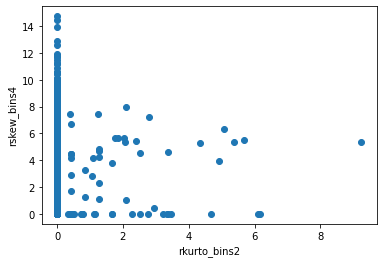

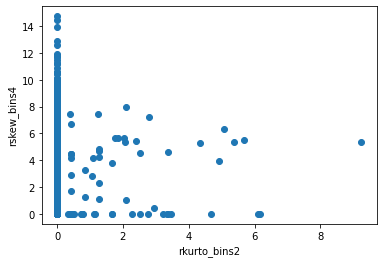

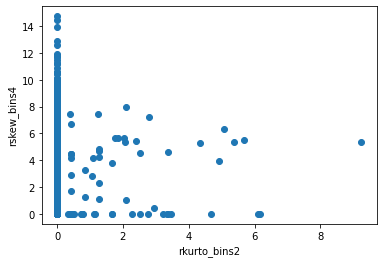

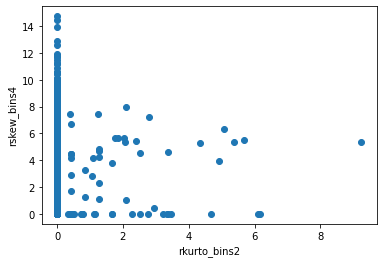

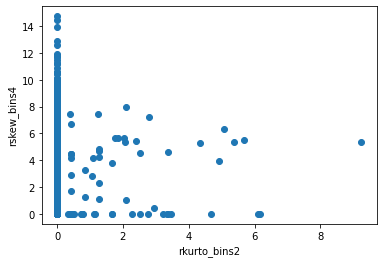

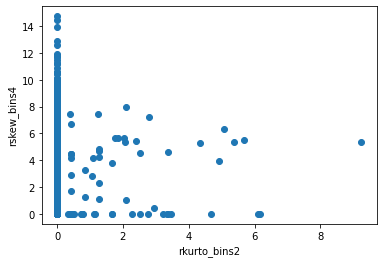

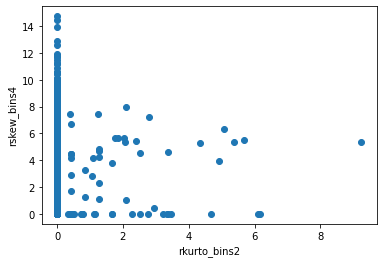

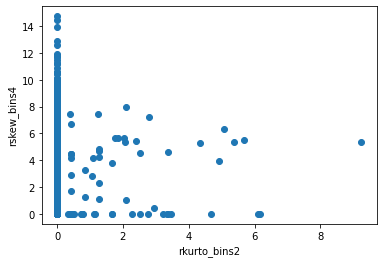

In [18]:
# BONUS:
# let's plot the correlation of the features in the correlated group from the
# previous cell

for feature in group['feature1']:
    plt.scatter(X_train['rkurto_bins3'], X_train[feature])
    plt.xlabel('rkurto_bins2')
    plt.ylabel(feature)
    plt.show()